<img src="images/GMIT logo.jpeg" width="700" align="center">

<h1 align ="center">GMIT Simulated Dataset</h1>

<h1 align ="center">Programming and Scripting Project 2019</h1>

<h2 align ="center">Roisin Fallon</h2>


### Table of Contents

1. [Introduction](#intro)
    * [Create a Dataframe](#df)
    * [Statistics](#st)
2. [ Python Libraries ](#lib)
3. [ Variables](#var)
   * [ Gender ](#gender)
   * [Course Type](#type)
   * [Age](#age)
   * [ Percent Achieved in Exam (Overall) ](#percent)
   * [ Grade Description ](#grade)
   * [ Hours Studied per week  ](#hour)
   * [ GMIT moodle logon ](#login)
4. [Simulated Dataset](#sim)
5. [Relationship between the variables](#rel)
   * [ Key ](#key)
   * [Info](#info)
   * [Calculate the percent of missing values](#per)
   * [Head of the dataset](#head)
   * [Tail of the dataset](#tail)
   * [ Correlation ](#corr)
   * [Scatterplot](#scatter)
       * [ Relationship between Percent Achieved and Hours Studied per week](#perr)
       * [ Relationship between Moodle Login and Hours Studied per week](#mood)
       * [ Relationship between Percent Achieved and Moodle Login per week](#pmm)
   * [Pairplot](#pm)
6. [Conclusion](#con)
6. [Bibliography](#bib)

<a name="intro"></a>
## Introduction

The aim of this project is to create a dataset by simulating a real-world phenomenon. It was important when selecting a database to ensure the dataset created can be measured and should be created using the numpy random package.

The real-world phenomenon that I decided to center my project around was students attending GMIT. The goal was to create a realistic variables and determine the relationship between these variables. In this project I have collected 300 data points across the variables. Below I have created a table of the variables and a brief description:

 
<table style="width:100%">

<tr>
<th style="width:15%">Gender</th>
<td>Gender of the students attending GMIT - Male Female</td>
</tr>

<tr>
<th style="width:15%">Age</th>
<td>Age of the students attending GMIT in the range of 17 -60 years old. This age group is to account for the fact that there are more people attending college as mature students. </td>
</tr>

<tr>
<th style="width:15%">Percent</th>
<td> % grade of the student overall mark for their perspective courses</td>
</tr>

<tr>
<th style="width:15%">Grade Description</th>
<td> Based on the percent achieved this column will reflect the Description of the grade achieved</td>
</tr>

<tr>
<th style="width:15%">Course Type</th>
<td> Students that are currently studying Part Time or Full Time Courses </td>
</tr>
<tr>
    
<th style="width:15%">Hours</th>   
<td>Hours spent studying for the course, within this it is divided into Part time and Full time students as it will better reflect the dataset</td>
</tr>

<tr>
<th style="width:15%">Moodle login</th>   
<td>Reflects the number of times the student login to the GMIT moodle page per week</td>
</tr>

</table>  




Students were seperated according to their genders as it often stated that there is a difference in the way in which males and females study. For each of the variables I have discussed why I have selected the distribution type and in some cases explain the other viable options that could have been used. 

<a name="df"></a>
### Creating a Dataframe:

Instead of creating a dataframe at the end when all the variables have been created, I  decided to create the dataframe at the beginning of the project and add each variable seperately. I feel that it is a more structured approach as I can demonstrate that a variable has been added successfully using the head function and can also demonstrate the distribution type selected both through theory and visualisation (ie. plots).

<a name="st"></a>
### Statistics:

The statistics used in this project were take from the following source <a href= https://hea.ie/statistics-archive/>Click Here </a>

You will be prompted to enter the following:
 * Academic Year - Select 2017/2018 ;  
 * Student Type -Select Enrolments; 
 * Enrolment Type -Select Enrolments Summry. 

A series of Exel spreadsheets  will be generated. The 2 excel spreadsheets I used for this project were the followign:
 1. Enrollment (Full Time) by Institute and Programme Type, 2017_18;
 2. Enrollment (Part Time) by Institute and Programme Type, 2017_18. 

From this I selected the GMIT statistics. For user ease I have also included the excel spreadsheets with only the relevant GMIT data attached tothis project. 

<a name="lib"></a>
## Python Libraries

#### Anaconda on your device (version 3.7 +)

<a href=https://www.anaconda.com/distribution/> Download here </a>

This contains porting for the library listed below. By downloading Anaconda it removes the need to import numerous libraries seperately.

#### Pandas

<a href=https://pandas.pydata.org/getpandas.html> Download here </a>

This is a Python package designed to strucure information in rows and columns. It is known for quick and easy data manipulation, aggregation, and visualization. Python takes in data via a CSV, TSV file or SQL database and creates a Python object called a data frame. Brief Introducton of Panda outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673> here. </a>

#### NumPy

<a href=http://www.numpy.org/> Download here </a>

This is a numerical library, performs many mathematical operations and handles i. Brief introductiion outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-numpy-library-6f61b7dee4db> here </a>

#### Matplotlib

<a href=https://matplotlib.org/downloads.htmll> Download here </a>

This is a plotting library, makes 2D plots that helps in the visualisation of figures using one or multiple numeric variables. It can generate histograms, pie charts, time series, boxplot, violin plot, stack plot, stem plots and scatter plots. It can be used in Python scripts, Jupyter notebook, and web application servers. Brief Introduction outlined <a href=https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70> here. </a>

#### Seaborn

This a satistical plotting library which has more advanced data visualisation than matplotlib (both are plotting libraries). Seaborn produces nice visualizations eliminating much of the work necessary for producing similar visualizations with matplotlib. It gives a high-level interface to draw statistical graphs, making it easier to generate more complex visualizations. Brief introduction outlined <a href=https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850> here. </a>

In [1]:
# Import the libraries
import numpy as np
import pandas as pd


# Visualisation library
import seaborn as sns

# current version of seaborn creates warnings this will remove them
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
# To plot the graph embedded in the notebook
%matplotlib inline

import random

In [2]:
# Standardise the size of the plots throughout this project
plt.rcParams['figure.figsize'] = (20, 12)
sns.set_style("white")

<a name="var"></a>
## Variables

<a name="gender"></a>
###  Gender Variable

<img src="images/gender.jpg" width="600" align="center">

* Gender is a categorical variable in that it has two categories male and female and is of dicrete distribution. 
* As stated earlier to get the most accurate reflection of the GMIT campus I used statistics from the Higher Education Authority for the most recent year (2017/2018) <a href= https://hea.ie/statistics-archive/>[1] </a> 
* In summary there were more males than females attending GMIT with males accounting for 55.2% and females accounting for 44.8%.

<b><u><i>Distribution Types: </i></u></b>
* As the gender variable has only 2 possible outcomes - male or female there is a number of different functions that can be used to generate the random sequence of variables. I will outline the possibilitis below and explain why I selected the choice function.

<b><u><i> Binomial Distribution </i></u></b> (Discusses in Course Type) was a viable option


<b><u><i> Uniform Distribution:</i></u></b>

$$ numpy.random.uniform(low=0.0, high=1.0, size=None) $$

* Low: Refers to lower bound. Values Generated will be greater than or equal to low. Default is 0.
* High: Refers to upper bound. Values Generated will be less than high. Default is 1.
* Size: Output the shape. Default(none) will return single values. <a href=https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.uniform.html>[3] </a>

Uniform distributions is symmetric. These are probability distributions where any value within the given interval is equally likely to be drawn. Thus, the distribution is basically a straight line.
In uniform distribution the mean and median coincide. The reason I did not select this to generate a random sequence for the gender variable was due to the fact that the probability for male and female is not the same . In my case the number of males is sligtly higher, it is not equally likely that male or female will be selected. Thus I did not select this distribution type for the variable gender


<b><u><i> numpy.random.randint </i></u></b>

$$ numpy.random.randint(low, high=None, size=None, dtype='l') $$

randint function returns a random integer from low (inclusive) to high (exclusive), both of which must be integer type values.

Low: refers to the starting point i.e. smallest integer to be taken from the integer.
High: refers to the largest number to be drawn from the distribution. This value is optional so if not included the numbers generated will be [0, low].
Size: refers to shape of the output. This is optional and has a default value none which would return a single value.
dtype: default is integer <a href=https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html>[4] </a>

<i> Reasoning: The above functions were not selected as they use integers to represent indices to the array where 1 represents Females and 2 was Males. Using these functions it would be recommended to convert the integer into strings as it is more readible for people who are using theses analytics and to keep the integers when performing calculations. 
    

<b><u><i> numpy.random.choice:</i></u></b>

$$ numpy.random.choice(a, size=None, replace=True, p=None) $$

This function returns a random sample from the non-empty sequence. Index Error occurs if no value (list or sequence) is passed into this function as you cannot make a selection from an empty sequence. This function selects a value from a give array, and repeats for the number of times specified. random.choices function is used when you want to choose multiple items out of a list including repeated. <a href=https://pynative.com/python-random-choice/>[5] </a>

<i> Reasoning for selecting Choice</i> Choice was selected as it used strings and not numeric values like in the other distribution types. This meant I did not have to convert the numeric values to strings. 

In [3]:
'''

# Options that were not selected:

Male = 1 or Female = 2

# Using binomial

gender = np.random.binomial(1, 0.45, 1000)

# Using randint
gender = np.random.randint(1, 3, 1000) 

'''
# Choice Option:

# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Define the gender variables

gender = ["Male", "Female"]

# the random.choice function lets us distribute the data to match the real world data 

df = pd.DataFrame(np.random.choice(gender, 300, p=[0.552, 0.448]))

# Rename column
df.columns = ['Gender']

In [4]:
# Print the first 5 values 

df.head()

,Gender
0,Male
1,Female
2,Male
3,Female
4,Female


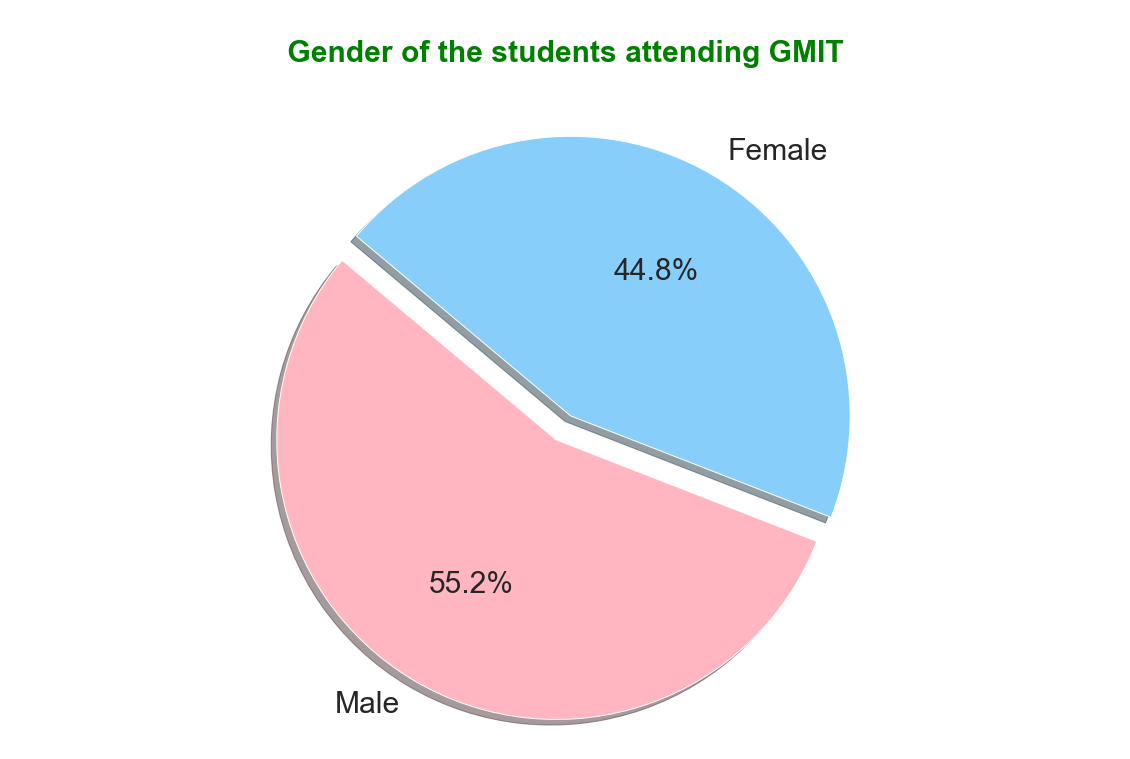

In [5]:
# Adapted from: https://pythonspot.com/matplotlib-pie-chart/ [12]

# Data to plot
labels = 'Male', 'Female'
slices_gender = [0.552, 0.448]
colors = ['lightpink', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(slices_gender, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 30})
plt.title("\n Gender of the students attending GMIT \n", fontweight="bold", fontsize="30", color="g")

plt.axis('equal')
plt.show()


<i> This pie chart represents the distribution of males to females in the dataset </i>

<a name="type"></a>
### Course Type Variable

The course Variable describes the number of students that have enrolled in full time and part time courses at GMIT. The statistics used for this variable are again derived from the Higher Education Authority <a href= https://hea.ie/statistics-archive/>Click here [1]</a> As mentioned earlier I have summarised the GMIT findings to one spreadsheeet which I have included in my Github repository https://github.com/Roisin-Fallon/Programming-for-Data-Analysis-Project-2019/tree/master/GMIT%20Statistic 

<b><u><i> Binomial Distribution:</i></u></b>

$$ 𝑛𝑢𝑚𝑝𝑦.𝑟𝑎𝑛𝑑𝑜𝑚.𝑏𝑖𝑛𝑜𝑚𝑖𝑎𝑙(𝑛,𝑝,𝑠𝑖𝑧𝑒=𝑁𝑜𝑛𝑒) $$
 
n denotes the number of trials
p refers to the probability of each trial
size refers to number of times tested

* Each trial is independent of the others. 
* A trial is considered independent if the outcome on one trial does not affect the outcome on other trials. Thus the probability of success (p) is the same on every trial. 
* There are only two possible outcomes in a trial- for course type variable there are 2 possibele outcomes, Full Time and Part Time. <a href= https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html> [2]</a>


In this case I decided to select binomial distribution for the simple fact that I used choice for the gender variable. Binomial Distribution allows to account for the different probabilities which is important as there  

In [6]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

course = []

# Normal distribution of grades divided into genders to account for result variance between genders
for row in df.Gender:
    # Full Time
    if row in ['Male']:
        course.append(np.random.binomial(1, 0.90))
    elif row in ['Female']:
        course.append(np.random.binomial(1, 0.85))
    

df["Course"] = course
df["Course"].replace({0:'Part Time', 1:'Full Time'}, inplace=True)

In [7]:
df.head()

,Gender,Course
0,Male,Full Time
1,Female,Full Time
2,Male,Full Time
3,Female,Full Time
4,Female,Full Time


<a name="age"></a>
### Age Variable 


<img src="images/age.jpg" width="600" align="center">

* Triangular method returns random floating numbers between 2 specified values. 
* The reason why I selected this method for Age is the ability to specify a third parameter called mode. The mode parameter allows the opportunity to weigh the possible outcomes towards one of the 2 parameters. <a href=https://kite.com/python/docs/random.triangular>[4] </a>
* The excel spreadsheet for GMIT 2017-2018 breaks down the number of students for each year starting at 17, we can deduce that the mode for males and females is different. Furthermore, the age mode varied depending if students were studing full or part time. 
* In this situation mode for males tudying full time was 19 years and females studying full time was 22 years. 
* The mode age is higher for studens studying part time with male mode age is 35 and female mode age is 29. This makes sense as there are increasing number of people going back to college part time as mature student as it allows them to continue to work while developing a degree. 
* Thus I seperated the age variable  based on both gender and course type so it would better reflect the real life situation 

 <i> Further down I have explained why I did not use uniform distribution and instead decided to go for triangular! </i>

In [8]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Age variable created based on gender and course type
cnt = 0
for idx, val in enumerate(df.itertuples()):
    if df.Course[idx] == 'Full Time':
        if df.Gender[idx] == "Male":
            df.loc[idx, 'Age'] = round(np.random.triangular(17, 19, 50)) 
        elif df.Gender[idx] == "Female":
            df.loc[idx, 'Age'] = round(np.random.triangular(17, 22, 50)) 
    else:
        if df.Gender[idx] == "Male":
            df.loc[idx, 'Age'] = round(np.random.triangular(17, 35, 50)) 
        elif df.Gender[idx] =="Female":
            df.loc[idx, 'Age'] = round(np.random.triangular(17, 29, 50)) 

In [9]:
df.head()

,Gender,Course,Age
0,Male,Full Time,21.0
1,Female,Full Time,31.0
2,Male,Full Time,26.0
3,Female,Full Time,36.0
4,Female,Full Time,36.0


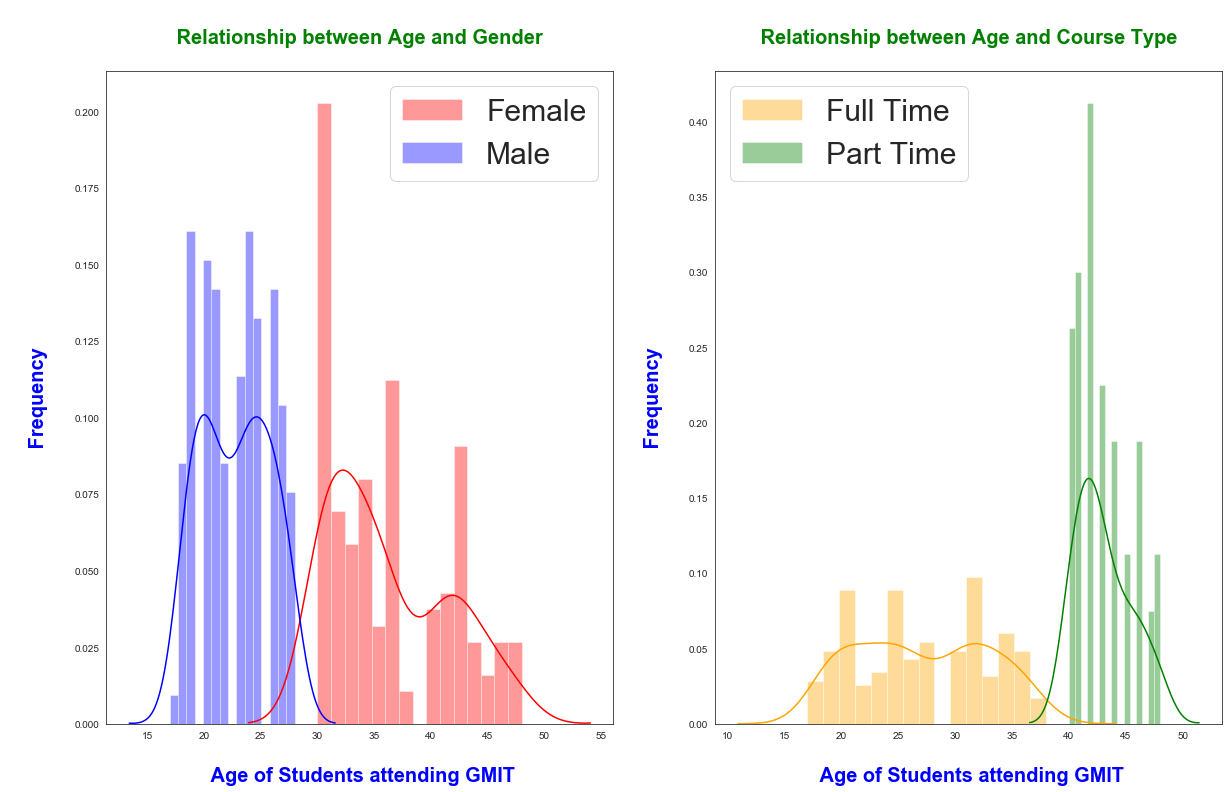

In [10]:
# Relationship between gender and age 

female = df.loc[df.loc[:,'Gender'] == "Female"]['Age']
male = df.loc[df.loc[:,'Gender'] == "Male"]['Age']

plt.subplot(1, 2, 1) 
sns.distplot(female, color="r",bins=15, label='Female')
sns.distplot(male, color="b", bins=15, label='Male')

# Format Plots 
plt.xlabel("\n Age of Students attending GMIT", fontweight="bold", fontsize="20", color="b")  
plt.ylabel("\n Frequency \n", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Relationship between Age and Gender \n", fontweight="bold", fontsize="20", color="g")
plt.legend(prop={'size': 30})

# Relationship between course type and age
plt.subplot(1, 2, 2)

full = df.loc[df.loc[:,'Course'] == "Full Time"]['Age']
part = df.loc[df.loc[:,'Course'] == "Part Time"]['Age']

sns.distplot(full, color="orange",bins=15, label='Full Time')
sns.distplot(part, color="g", bins=15, label='Part Time')

# Format Plots 
plt.xlabel("\n Age of Students attending GMIT", fontweight="bold", fontsize="20", color="b")  
plt.ylabel("\n Frequency \n", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Relationship between Age and Course Type \n", fontweight="bold", fontsize="20", color="g")
plt.legend(prop={'size': 30})
plt.show()

<i> <b> Distplot to the left: </b> From this we can see that Male distibution with respects age is bimodel for males and the female plot is a positively skewed distribution 

<b> Distplot to the right: </b> From this plot we  can see that the distribution for full time appears unifrom whereas the part time course is positively skewed to the right. This backs up the fact that age people doing part time courses are generally higher than those doing full time course. 

### Why I didn't use Uniform Distribution for the age variable

* Another option that could be used is uniform distribution or randint where every age is equally likely.
* The plot above does not accurately reflect the age of the student population. We can see that it is a uniform distribution where the number of people over the age of 50 and under the age of 30 is similar where in actual fact you would expect that the majority would be in the range of 18 - 24 years. 
* To further solidify why I feel this is not a good reflection of the expected data was the mean and median is 40. 
* Although mean can be skewed with the presence of outliers you would expect median (middle value) to be alot lower. 
* As a result I will not be using the randint function to generate random samples for age in this dataset.

Average age of the dataset using randint:  37.256
Average age of the dataset using randint:  36.0


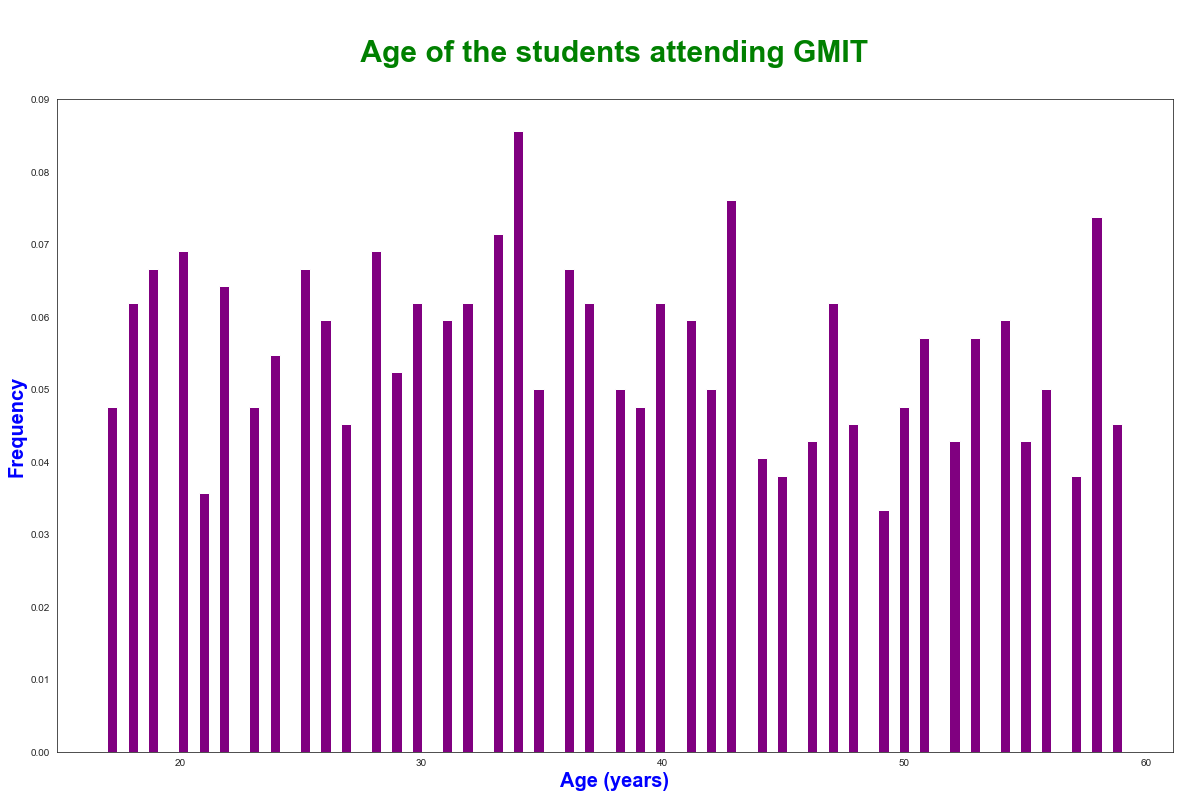

In [11]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Generate age between 18 and 60 years using randint                   
age1 = np.random.randint(17, 60, 1000) 
# print("age)

# Average age of the sample

print("Average age of the dataset using randint: ", np.mean(age1))

# Median age of dataset created using randint

print("Average age of the dataset using randint: ", np.median(age1))

# Histogram reflecting the age using the randint 
plt.hist(age1, bins= 100, density=True, facecolor='purple')
plt.ylabel("Frequency", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("Age (years)", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Age of the students attending GMIT \n", fontweight="bold", fontsize="30", color="g")
plt.show()

<a name="percent"></a>

### Percent Achieved in Exam (Overall)



<table style="width:100%">
<tr>
<th style="width:25%">Classification of Level 8</th>
<th style="width:15%">Percentage Point Value (PPA) boundary values</th>
<th>Description</th>
</tr>

<tr>
<td>First Class Honours</td>
<td>70 – 100%</td>
<td>Achievement indicates that required for a Pass and in most respects is significantly and consistently beyond this</td>
</tr>

<tr>
<td>Second Class Honours Grade 1</td>
<td>60 – 69%</td>
<td>Achievement indicates that required for a Pass and in many respects is significantly beyond this</td>
</tr>

<tr>
<td>Second Class Honours Grade 2</td>
<td>50 – 59%</td>
<td>Achievement indicates that required for a Pass and in some respects is significantly beyond this</td>
</tr>

<tr>
<td>Pass</td>
<td>40 – 49%</td>
<td>Attains all the minimum intended programme learning outcomes</td>
</tr>

<tr>
<td>Marginal Fail </td>
<td>35 – 39%</td>
<td>Has not attained all the minimum intended programme learning outcomes. Within compensatable range.</td>
</tr>

<tr>
<td>Fail</td>
<td>0 – 34%</td>
<td>Has not attained all the minimum intended programme learning outcomes</td>
</tr>
</table> 

<a href=https://www.gmit.ie/sites/default/files/public/directorate/docs/code-practice-no3_1.pdf> GMIT Student Assessment: Marks and Standards page 25 [6] </a>

<b><i><u> Normal Distribution: </u></i></b>

There is a substantial amount of research that suggests that students result are based on normal distribution. According to edell, Parducci, & Roman, 1989, a US university psychology department recommends that results are distributed as follows:  15% A’s, 25% B’s, 45% C’s, 10% D’s and 5% F’s . The curve used for assigning grades has been discussed in length <a href="https://digitalcommons.georgiasouthern.edu/cgi/viewcontent.cgi?article=1101&context=ij-sotl"> here [7] </a> but the main take home point is that advocates believe that in large classes students ability is likely to be normally distributed. 

It is difficult to attain if there is any significant difference in the results achieved based on gender. One article that suggests that in Final year medicinal examinations females outperformed their male counterparts. 
<a href=https://www.researchgate.net/publication/51353539_Gender_differences_in_the_results_of_the_final_examination_at_University_College_Dublin> [8] </a> As a result I have decided to have the average result achieved by females higher than that for males. Again I am trying to best reflect a real life scenario!

In [12]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# Define the gender variables

sex = ["Male", "Female"]

# the random.choice function lets us distribute the data to match the real world data 
# Adapted from: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html

# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

# To append or add another column to the dataframe created
percent = []

# Normal distribution of grades divided into genders to account for result variance between genders
for row in df.Gender:
    if row in ['Female']:
        percent.append(np.random.normal(60, 12))
    else:
        percent.append(np.random.normal(48, 12))

# Percent to 2 decimal places      
df["Percent"] = np.round((percent), 1)

In [13]:
# Demonstrats that a new variable has been added
df.head()

,Gender,Course,Age,Percent
0,Male,Full Time,21.0,53.7
1,Female,Full Time,31.0,45.7
2,Male,Full Time,26.0,65.2
3,Female,Full Time,36.0,56.2
4,Female,Full Time,36.0,51.4


In [14]:
# Statistical summary of marks achieved by students at GMIT not seperated by gender
df["Percent"].describe()

count    300.000000
mean      54.785333
std       12.461700
min       17.200000
25%       46.375000
50%       55.450000
75%       63.300000
max       93.200000
Name: Percent, dtype: float64

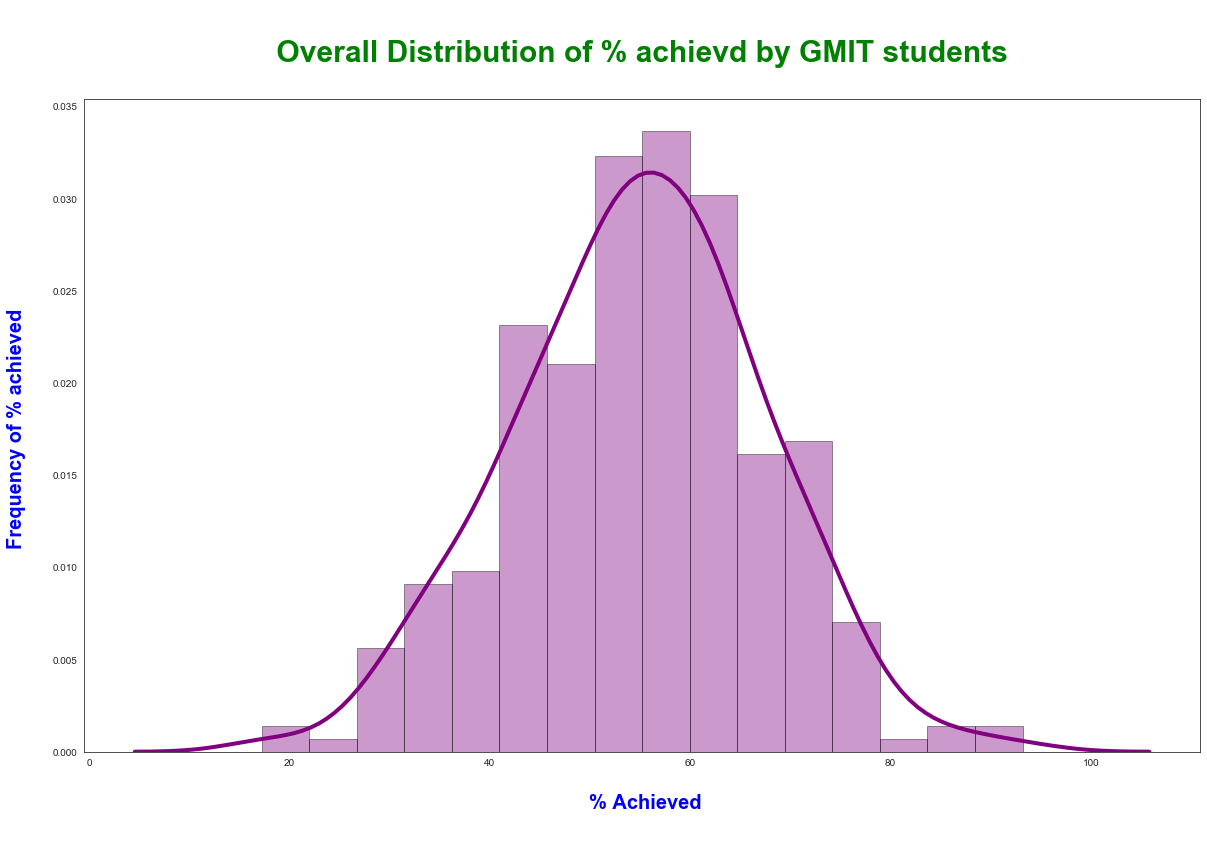

In [15]:
# Histogram to show the overall distribution of Percent achieved by students at GMIT
sns.distplot(df["Percent"], hist=True, kde=True, color='purple', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})

# Format the plot
plt.ylabel("Frequency of % achieved \n", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("\n  % Achieved \n", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Overall Distribution of % achievd by GMIT students \n", fontweight="bold", fontsize="30", color="g")
plt.show()

<i> Overall % achieved by college students here there is no distinction between the males and females. This plot reflects the marking scheme distribution that is applied when correcting exams. </i>

In [16]:
# Sort the dataframe by gender
male_mark = df.loc[df['Gender'] == "Male"]
female_mark = df.loc[df['Gender'] == "Female"]

In [17]:
# Statistical summary of the male percent achieved
male_mark['Percent'].describe()

count    144.000000
mean      50.129861
std       11.086103
min       19.200000
25%       42.800000
50%       50.650000
75%       57.650000
max       76.400000
Name: Percent, dtype: float64

In [18]:
# Statistical summary of the female percent achieved
female_mark['Percent'].describe()

count    156.000000
mean      59.082692
std       12.143253
min       17.200000
25%       52.025000
50%       60.000000
75%       66.375000
max       93.200000
Name: Percent, dtype: float64

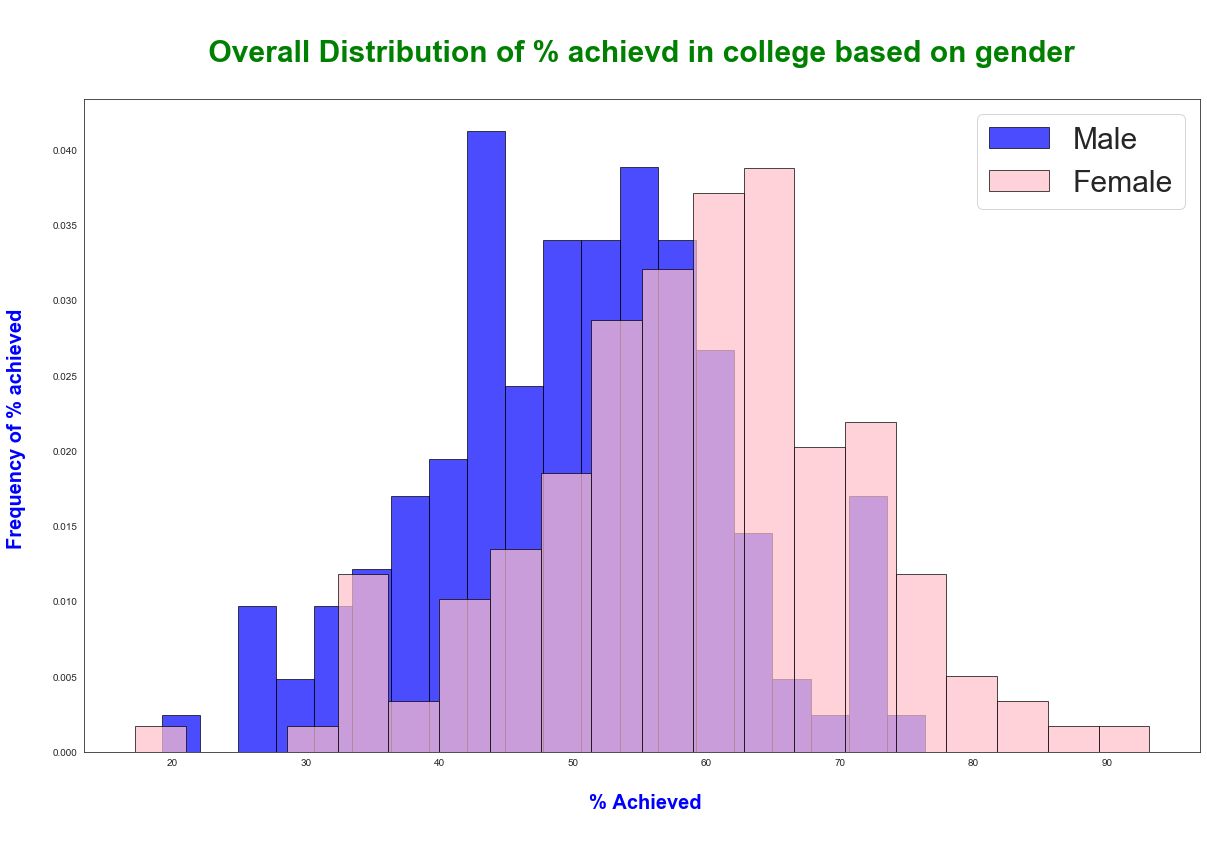

In [19]:
# Histogram to show the distribution of Percent achieved by students at GMIT based on gender
plt.hist(male_mark.Percent,  bins= 20, density=True, facecolor='blue', alpha=0.7, edgecolor='black', linewidth=1, label="Male")
plt.hist(female_mark.Percent,  bins= 20, density=True, facecolor='pink', alpha=0.7, edgecolor='black', linewidth=1, label="Female")

# Format the plot
plt.ylabel("Frequency of % achieved \n", fontweight="bold", fontsize="20", color="b")  
plt.xlabel("\n  % Achieved \n", fontweight="bold", fontsize="20", color="b")    
plt.title("\n Overall Distribution of % achievd in college based on gender \n", fontweight="bold", fontsize="30", color="g")
plt.legend(prop={'size': 30})
plt.show()

<i> From this we can see that females achieve higher % than males which reflects the stusies outlined earlier. As we can see the distribution of marks is normally distributed for both genders which again would reflect a real life scenario, where there would be a have the majority of people receiving a % in the range of 40-50% for males and slightly higher 55-75% for females. There are a small number of people who fail and who get Class I Honours. </i>

<a name="grade"></a>
### Grade Description Variable

In [20]:
def result(percent):
    if (percent >= 70.00) & (percent <= 100.00 ):
        return "First Class Honours"
    elif (percent >= 60.00) & (percent <= 69.99):
        return "Second Class Honors Grade 1 (2:1)" 
    elif (percent >= 50.00) & (percent <= 59.99):
        return "Second Class Honors Grade 2 (2:2)"
    elif (percent >= 40.00) & (percent <= 49.99):
        return "Pass"
    elif (percent >= 35.00) & (percent <= 39.99):
        return "Marginal Fail"
    else:
        return "Fail"

vfunction = np.vectorize(result)
result = vfunction(df["Percent"])  
df["Result"] = result 

In [21]:
df.head()

,Gender,Course,Age,Percent,Result
0,Male,Full Time,21.0,53.7,Second Class Honors Grade 2 (2:2)
1,Female,Full Time,31.0,45.7,Pass
2,Male,Full Time,26.0,65.2,Second Class Honors Grade 1 (2:1)
3,Female,Full Time,36.0,56.2,Second Class Honors Grade 2 (2:2)
4,Female,Full Time,36.0,51.4,Second Class Honors Grade 2 (2:2)


<a name="hour"></a>
### Hours Studied per week Variable

<img src="images/study.jpg" width="600" align="center">

This variable relates to the amount of time students spend studying per week.  It is important to note that this includes timetabled classes, lectures, tutorials and time spent studying personally. Again the key delimeator to the amount of time that students spend studying appears to be the formal status of the student i.e. are they Full Time and Part Time students. Theoretically Part  time students should spend less time in the formal learning environment (lectures and tutorials) <a href=https://hea.ie/assets/uploads/2018/01/HEA-Eurostudent-Survey.pdf>[9]</a> According to HEA Eurostudent Survey there is no significant difference in the amount of time males and females students spend studying. 

In [22]:
# Adapted from: https://stackoverflow.com/a/55115017 [13]
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

cnt = 0
for idx, val in enumerate(df.itertuples()):
    if df.Course[idx] == 'Full Time':
        if df.Percent[idx] >= 60:
            df.loc[idx, 'Hours'] = round(np.random.normal(37.7, 5))
        elif df.Percent[idx] < 60  and df.Percent[idx] >= 40:
            df.loc[idx, 'Hours'] = round(np.random.normal(20, 5))
        elif df.Percent[idx] < 39:
            df.loc[idx, 'Hours'] = round(np.random.uniform(0, 6))
    elif df.Course[idx] =="Part Time":
        if df.Percent[idx] >= 60:
            df.loc[idx, 'Hours'] = round(np.random.normal(21.8, 5))
        elif df.Percent[idx] < 60 and df.Percent[idx] >= 40:
            df.loc[idx, 'Hours'] = round(np.random.normal(12, 5))
        elif df.Percent[idx] < 39:
            df.loc[idx, 'Hours'] = round(np.random.uniform(0, 4))

<i> Please note for the Percent that is under 39% for both full and part time courses I used uniform distribution as this allowed me to put a minimum hours studied at 0 as initially when I used normally distribution for this it gave a negative hour. As the goal of this project is to reflect real life scenario this was the best approach as in reality you cannot study a negaive amount of time. </i>

In [23]:
df.head()

,Gender,Course,Age,Percent,Result,Hours
0,Male,Full Time,21.0,53.7,Second Class Honors Grade 2 (2:2),22.0
1,Female,Full Time,31.0,45.7,Pass,14.0
2,Male,Full Time,26.0,65.2,Second Class Honors Grade 1 (2:1),45.0
3,Female,Full Time,36.0,56.2,Second Class Honors Grade 2 (2:2),18.0
4,Female,Full Time,36.0,51.4,Second Class Honors Grade 2 (2:2),16.0


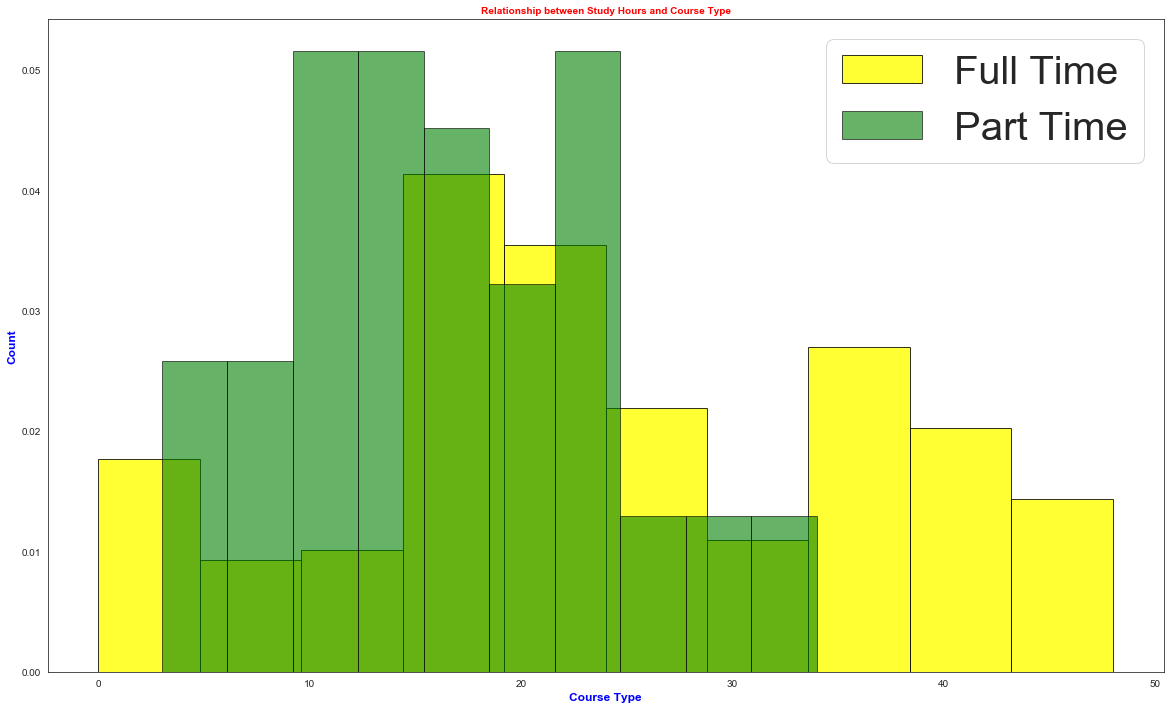

In [24]:
# Sort the dataframe by course type
full = df.loc[df['Course'] == "Full Time"]
part = df.loc[df['Course'] == "Part Time"]

plt.hist(full.Hours, density=True, facecolor='yellow', alpha=0.8, edgecolor='black', linewidth=1, label="Full Time")
plt.hist(part.Hours, density=True, facecolor='green', alpha=0.6, edgecolor='black', linewidth=1, label="Part Time")
             
plt.xlabel("Course Type", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Count", fontweight="bold", fontsize="12", color="b")                                               
plt.title("Relationship between Study Hours and Course Type", fontweight="bold", fontsize="10", color="r")  
plt.legend( prop={"size":40})
plt.show()

<i> From this we can see that the minimum amount of time spent studying for Full Time was 0 hours and for part time is ~ 3 hours but  in general we can see that the maximum amount of time spent studying is much higher for people studying full time which makes sense. </i>

<a name="login"></a>
### GMIT Moodle login Variable

<img src="images/moodle.jpg" width="600" align="center">

GMIT Moodle login refers to the number of times each student logs into their student portal in a given month. This will include accessing GMIT email address as they are all related. The specifity of this variable has meant I was unable to find real life statistcs. However, it would be reasonable to assume that the students who are studying Full Time would have a higher number of logins then students whom study Part Time.

Moodle Login could be accurately depicted using normal distribution or logistic distribution. It is first important to note that both types of distributions are vert similar with the logistic functions having thicker tails and higher kurtosis<a href=http://visionlab.harvard.edu/Members/Anne/Math/Logistic_vs_Gaussian.html>[10]</a>. Logistic function is a continuous probability distribution which has been used for growth models and in logistic regressions. One factor that is important to note prior to selecting logistic function over normal distribution it requires a relatively high mean and a relatively small location paramater otherwise the issue of negative logins coule occur. In reality the minimum login would be zero it can never be negative. Using the figures I selected I have not had this isssue. 

In [25]:
# Seed Reset: Set the random seed so the numbers will stay the same each time the cell is executed
np.random.seed(1234) 

cnt = 0
for idx, val in enumerate(df.itertuples()):
    if df.Course[idx] == 'Full Time':
        if df.Percent[idx] >= 60:
            df.loc[idx, 'Login'] = round(np.random.logistic(700, 50))
        elif df.Percent[idx] < 60  and df.Percent[idx] >= 40:
            df.loc[idx, 'Login'] = round(np.random.logistic(400, 30))
        elif df.Percent[idx] < 39:
            df.loc[idx, 'Login'] = round(np.random.logistic(100, 10))
    else:
        if df.Percent[idx] >= 60:
            df.loc[idx, 'Login'] = round(np.random.logistic(350, 35))
        elif df.Percent[idx] < 60 and df.Percent[idx] >= 40:
            df.loc[idx, 'Login'] = round(np.random.logistic(100, 20))
        elif df.Percent[idx] < 39:
            df.loc[idx, 'Login'] = round(np.random.logistic(50, 10))

In [26]:
df.head()

,Gender,Course,Age,Percent,Result,Hours,Login
0,Male,Full Time,21.0,53.7,Second Class Honors Grade 2 (2:2),22.0,357.0
1,Female,Full Time,31.0,45.7,Pass,14.0,415.0
2,Male,Full Time,26.0,65.2,Second Class Honors Grade 1 (2:1),45.0,687.0
3,Female,Full Time,36.0,56.2,Second Class Honors Grade 2 (2:2),18.0,439.0
4,Female,Full Time,36.0,51.4,Second Class Honors Grade 2 (2:2),16.0,438.0


In [27]:
# Sort the dataframe by course type
full = df.loc[df['Course'] == "Full Time"]
part = df.loc[df['Course'] == "Part Time"]

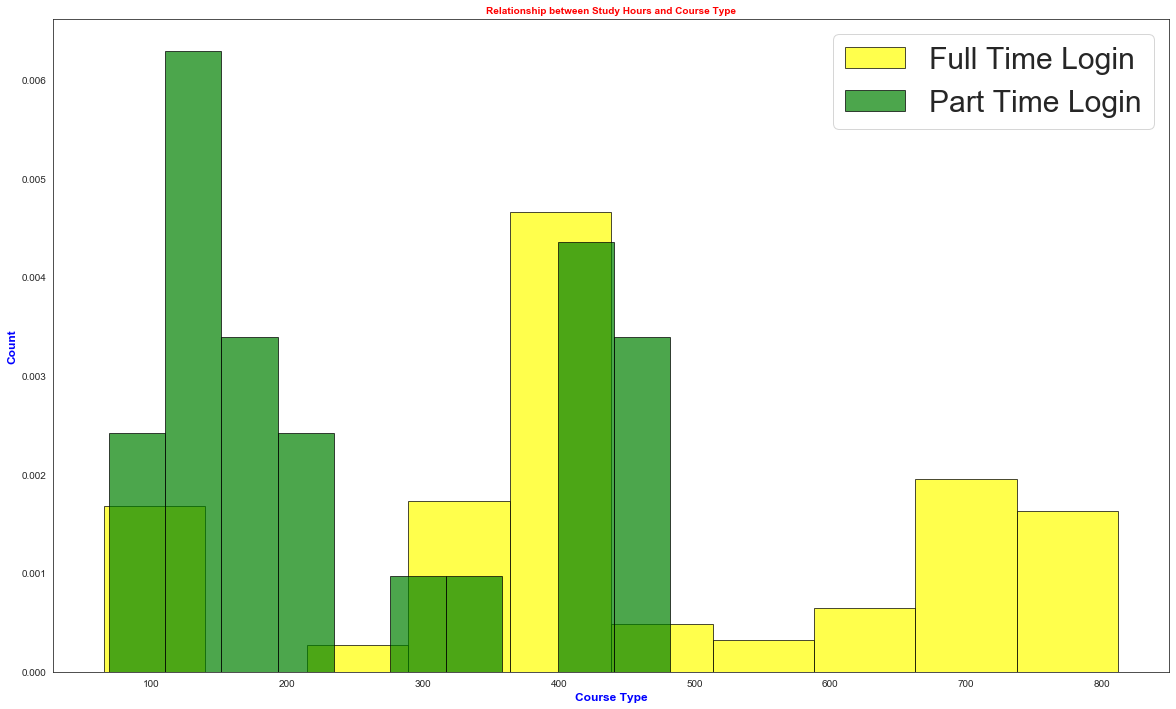

In [28]:
plt.hist(full.Login,  bins= 10, density=True, facecolor='yellow', alpha=0.7, edgecolor='black', linewidth=1, label="Full Time Login")
plt.hist(part.Login,  bins= 10, density=True, facecolor='green', alpha=0.7, edgecolor='black', linewidth=1, label="Part Time Login")
             
plt.xlabel("Course Type", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Count", fontweight="bold", fontsize="12", color="b")                                               
plt.title("Relationship between Study Hours and Course Type", fontweight="bold", fontsize="10", color="r")  
plt.legend( prop={"size":30})
plt.show()

<a name="sim"></a>
## Simulated Dataset

In [29]:
# Print the simulated data to the screen
df

,Gender,Course,Age,Percent,Result,Hours,Login
0,Male,Full Time,21.0,53.7,Second Class Honors Grade 2 (2:2),22.0,357.0
1,Female,Full Time,31.0,45.7,Pass,14.0,415.0
2,Male,Full Time,26.0,65.2,Second Class Honors Grade 1 (2:1),45.0,687.0
3,Female,Full Time,36.0,56.2,Second Class Honors Grade 2 (2:2),18.0,439.0
4,Female,Full Time,36.0,51.4,Second Class Honors Grade 2 (2:2),16.0,438.0
...,...,...,...,...,...,...,...
295,Male,Full Time,24.0,64.1,Second Class Honors Grade 1 (2:1),39.0,811.0
296,Female,Full Time,31.0,59.4,Second Class Honors Grade 2 (2:2),21.0,523.0
297,Female,Full Time,37.0,55.6,Second Class Honors Grade 2 (2:2),22.0,417.0
298,Female,Full Time,31.0,41.4,Pass,25.0,379.0


<a name="rel"></a>
## Relationship between the variables

<a name="key"></a>
### Keys

The GMIT dataset holds keys and values for keys. This gives a quick insight into what the simulated GMIT dataset contains. <a href=https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/>[15]</a>

In [30]:
# What fields are in this dictionary

print("\n Keys in the simulated dataset: \n", df.keys())


 Keys in the simulated dataset: 
 Index(['Gender', 'Course', 'Age', 'Percent', 'Result', 'Hours', 'Login'], dtype='object')


<a name="info"></a>
### Info

Provides information on the simulated dataset including names of columns, total number of rows and columns, data type of each column, range index and memory usage.

In [31]:
print("\n**************************************")
print("Info on Simulated GMIT Student Dataset")
print("**************************************\n")   
df.info()


**************************************
Info on Simulated GMIT Student Dataset
**************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
Gender     300 non-null object
Course     300 non-null object
Age        300 non-null float64
Percent    300 non-null float64
Result     300 non-null object
Hours      297 non-null float64
Login      297 non-null float64
dtypes: float64(4), object(3)
memory usage: 16.5+ KB


<i> From the code above we can see that there are missing values present for 2 of the features:
    Login and Hours. The next thing we need to check is the percentage of missing values to see if anny action needs to be taken to deal with them 

<a name="per"></a>
### Calculate the percent of missing values

When we run the code below we can determine the percentage of null values. Depending on the percentage of missing values we would normally do the following:
   * 20 -25% missing values we can impute the features in  different ways like mean or median.
   * 70% or more missing values those features should be removed from the dataset as they would impact the results. <a href=https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c>[14]</a>

<i> From the code we can see that only 1% of Hours and Login contains missing vaalues and hence we can continue to analyse the dataset without making any changed.</i>

In [32]:
df.isnull().sum() / len(df) * 100

Gender     0.0
Course     0.0
Age        0.0
Percent    0.0
Result     0.0
Hours      1.0
Login      1.0
dtype: float64

<a name="head"></a>
### Head of the dataset

The head of the dataset allows us to get a quick look at the datset. Head prints out the first 5 rows by default. A different number can be printed out by passing a number into the paranthese e.g. df.head(2) this prints out the first 2 rows. From the head statement we can see the column names and number of columns.

In [33]:
# Default is the first 5 rows 

print("\n\n********************************************************************")
print("           Head of the simulated GMIT student dataset                       ")
print("********************************************************************")
df.head()



********************************************************************
           Head of the simulated GMIT student dataset                       
********************************************************************


,Gender,Course,Age,Percent,Result,Hours,Login
0,Male,Full Time,21.0,53.7,Second Class Honors Grade 2 (2:2),22.0,357.0
1,Female,Full Time,31.0,45.7,Pass,14.0,415.0
2,Male,Full Time,26.0,65.2,Second Class Honors Grade 1 (2:1),45.0,687.0
3,Female,Full Time,36.0,56.2,Second Class Honors Grade 2 (2:2),18.0,439.0
4,Female,Full Time,36.0,51.4,Second Class Honors Grade 2 (2:2),16.0,438.0


<a name="tail"></a>
### Tail of the dataset
The tail of the dataset prints out the last 5 rows by default. As described in the head of the dataset a different number of rows can be printed by passing number through the paranthese. By taking the head and tail of the dataset we can see there are 506 rows (0 to 505) although there are other functions that do ths better.

In [34]:
# Default is the first 5 rows 

print("\n\n********************************************************************")
print("           Tail of the simulated GMIT student dataset                       ")
print("********************************************************************")
df.tail()



********************************************************************
           Tail of the simulated GMIT student dataset                       
********************************************************************


,Gender,Course,Age,Percent,Result,Hours,Login
295,Male,Full Time,24.0,64.1,Second Class Honors Grade 1 (2:1),39.0,811.0
296,Female,Full Time,31.0,59.4,Second Class Honors Grade 2 (2:2),21.0,523.0
297,Female,Full Time,37.0,55.6,Second Class Honors Grade 2 (2:2),22.0,417.0
298,Female,Full Time,31.0,41.4,Pass,25.0,379.0
299,Male,Full Time,20.0,44.2,Pass,17.0,413.0


<a name="stats"></a>
### Statistical Summary

In [35]:
# Show the calculated statistics summary of the simulated dataset

print("\n****************************************************")
print("      Statistics Summary for the simulated dataset")
print("****************************************************")
df.describe().T.round(1)


****************************************************
      Statistics Summary for the simulated dataset
****************************************************


,count,mean,std,min,25%,50%,75%,max
Age,300.0,29.8,8.0,17.0,23.0,30.0,35.0,48.0
Percent,300.0,54.8,12.5,17.2,46.4,55.4,63.3,93.2
Hours,297.0,22.8,12.0,0.0,16.0,21.0,33.0,48.0
Login,297.0,423.3,211.4,65.0,317.0,405.0,611.0,812.0



## Correlation
* Correlation matrix measures the relationship between the variables
* Correlation coefficient ranges from -1 to 1
* Values close to 1 infers there is a strong positive correlation between the 2 variables
* Values close to -1 indicates there is a strong negative correlation <a href=https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155>[16]</a>

<a name="heat"></a>
### Heatplot

Heat maps display numeric tabular data where the cells are colored depending upon the contained value. Heat maps are great for making trends in this kind of data more readily apparent, particularly when the data is ordered and there is clustering. <a href=http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/>[11]</a>

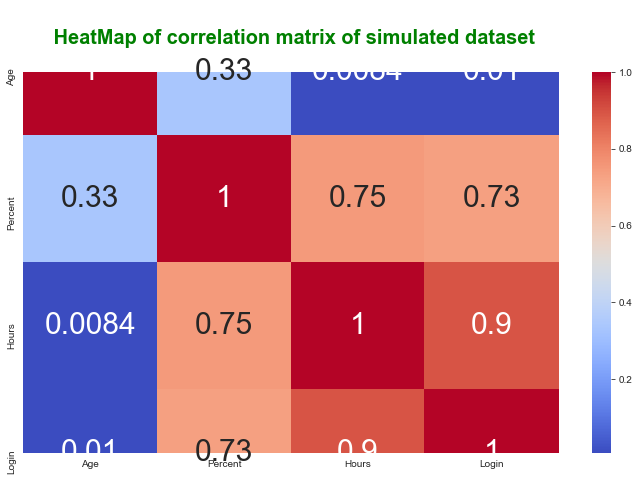

In [37]:
# To calculate the correlation between total bill andt tip 

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='coolwarm', linecolor='black', annot=True, annot_kws={"size": 30})
plt.title("\n HeatMap of correlation matrix of simulated dataset\n", fontweight="bold", fontsize="20", color="g")
plt.show()


<b> Please note the bottom and top of the correlation plot is cut off when code was run on my machine  after trying a number of ways to fix this it did not work. When researched further I became aware that this is a fault with the matplotlib regression introduced in 3.1.1 which has been fixed in 3.1.2 (still forthcoming). There was an option to downgrade matplotlib to the older version but decided against this as I could still read the numbers from the bootom line <a href=https://github.com/mwaskom/seaborn/issues/1773>[5]</a> This will not be an issue if you are using a older version of matplotlib</b>

In [38]:
df.corr().round(2)

,Age,Percent,Hours,Login
Age,1.00,0.33,0.01,0.01
Percent,0.33,1.00,0.75,0.73
Hours,0.01,0.75,1.00,0.90
Login,0.01,0.73,0.90,1.00


<i> From the correlation table and heatmap we can conclude the following:
   * The strongest correlation is seen between Hours Studied and Number of times Login to the Moodle server at 0.90. I have explained using the scatterplots below why this may be the case. 
   * Other strong correlions can be seen between percent achieved and Moodle Login; 
   * Percent Achieved and Hours Studied per week. 
    
We can also see that age has little to no correlaion with the other variables. 
    

<a name="bar"></a>
### Barplot fo Course and Hours Studied per week

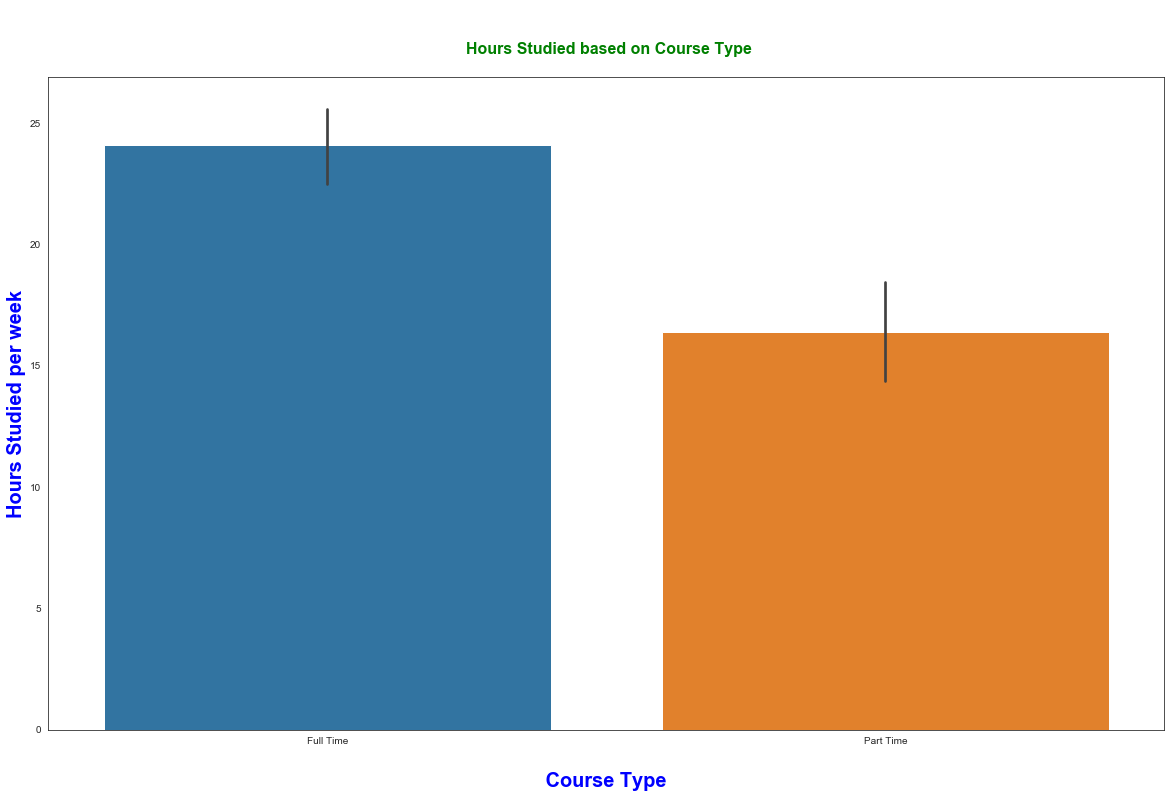

In [36]:
# Barplot which represents the course tyoe and Hours Studied per student per week

sns.barplot(x="Course", y="Hours", data = df)
plt.ylabel("Hours Studied per week", fontweight="bold", fontsize="20", color="b")                                 
plt.xlabel("\n Course Type ", fontweight="bold", fontsize="20", color="b") 
plt.title("\n\n  Hours Studied based on Course Type \n", fontweight="bold", fontsize="16", color="g") 
plt.show()

<i> From this barplot we can see that people who have undertaken a full time course on average study more in terms of hours when compared to part time students. Again this reflects real life as students who undertake part time courses often work full time so it would be near impossible in some cases to study the same amount as students who have undertaken a full time course  </i>

 <a name="scatter"></a>
### Scatterplot

 <a name="perr"></a>
#### Relationship between Percent Achieved and Hours Studied per week

<b><i><u> Hypothesis: </u></b></i>

<i>As a student you would expect the more lectures, tutorials and personal study the better you would do in exams. Again, there are a number of other factors that would affect your resultss e.g. student IQ but for the sake of this project we will not include these. We can see that there is a strong positive correlation 0.82 between hours studied and percent achieved. </i>

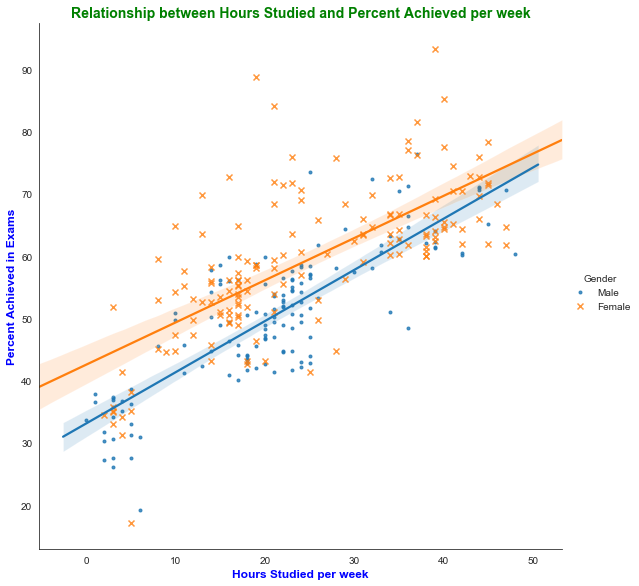

In [39]:
sns.lmplot(x="Hours", y="Percent", hue="Gender", markers=[".", "x"], size=8, data=df)

# Format plot
plt.xlabel("Hours Studied per week", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Percent Achieved in Exams", fontweight="bold", fontsize="12", color="b")                                               
plt.title("Relationship between Hours Studied and Percent Achieved per week", fontweight="bold", fontsize="14", color="g")  

plt.show()

<i>     
From the implot below we can see the relationship between the Percent Achieved and Hours Studied which is further divided by Gender. From the plot we can see there seems to be more outliers present for females when compared to males as we can see the points seem to be further away from the line. </i>


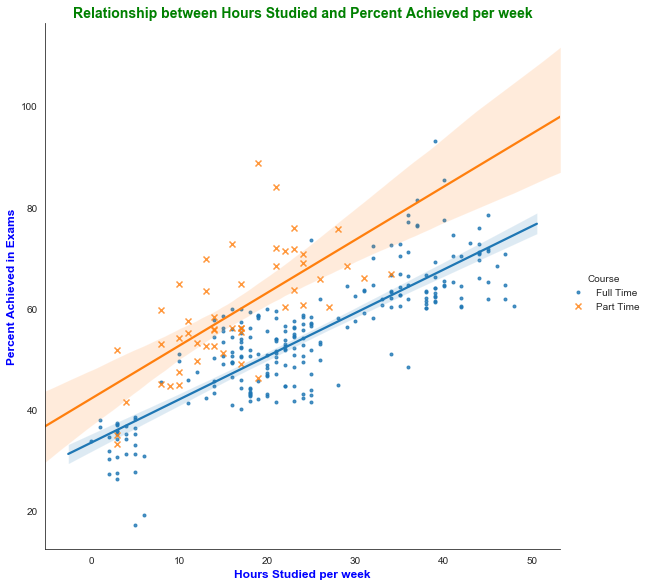

In [40]:
sns.lmplot(x="Hours", y="Percent", hue="Course", markers=[".", "x"], size=8, data=df)

# Format plot
plt.xlabel("Hours Studied per week", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Percent Achieved in Exams", fontweight="bold", fontsize="12", color="b")                                               
plt.title("Relationship between Hours Studied and Percent Achieved per week", fontweight="bold", fontsize="14", color="g")  

plt.show()

<i> Fromt this we can see that there is a positive correlation between hours studies and percent achieved as stated previously. Here we can see that it is visually evident that people who study full time study longer number of hours 

<a name="mood"></a>
#### Relationship between Moodle Login and Hours Studied per week

<b><i><u> Hypothesis: </u><i></b> 

<i> Again we would expect some sort of correlation between Moodle Login and Hours Studied as GMIT upload all lecture material on this server. Hence, when students start their personal study they would logon to the server. This is confirmed with the strongest correlation in the dataset with 0.87. 


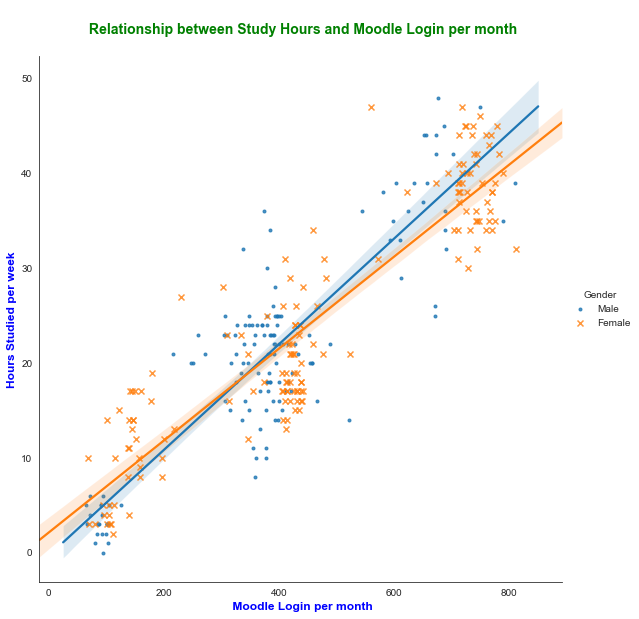

In [41]:
sns.lmplot(x="Login", y="Hours", hue="Gender", markers=[".", "x"], size=8, data=df)

# Format plot
plt.xlabel(" Moodle Login per month", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Hours Studied per week", fontweight="bold", fontsize="12", color="b")                                               
plt.title("\n Relationship between Study Hours and Moodle Login per month\n ", fontweight="bold", fontsize="14", color="g")  
plt.show()

<i> From this plot it is clear that there is a strong positive correlation between Moodle LogIn per month and hours studied. Again this makes sense as often when a student goes to study they have to access the Moodle server to get lecture notes etc. There are similar results seen for males and females with the majority of the points centered around the 400 LogIn per month. </i>

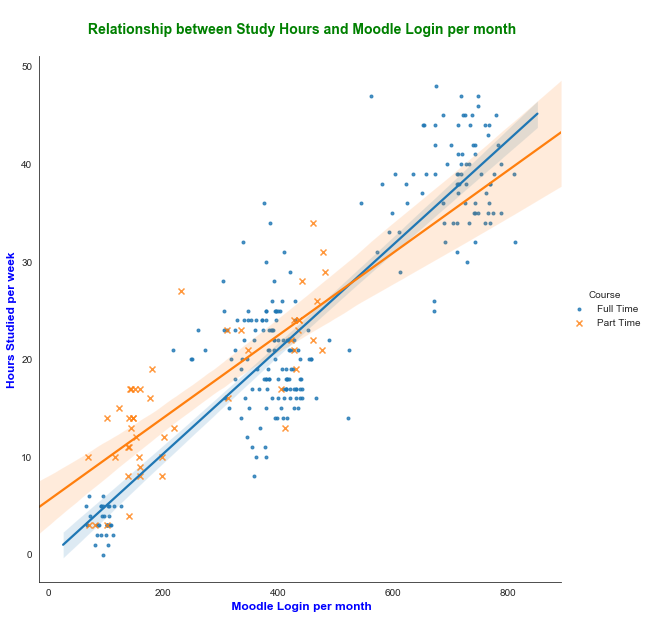

In [42]:
sns.lmplot(x="Login", y="Hours", hue="Course", markers=[".", "x"], size=8, data=df)
# Format plot
plt.xlabel(" Moodle Login per month", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Hours Studied per week", fontweight="bold", fontsize="12", color="b")                                               
plt.title("\n Relationship between Study Hours and Moodle Login per month\n ", fontweight="bold", fontsize="14", color="g")  
plt.show()

<i> From this plot it is clear that people who study full time have higher number of Moodle Login and appear to study for a larger number of hours than people who have underken part time course </i>

<a name="pmm"></a>
#### Relationship between Percent Achieved and Moodle Login per week

<b><i><u> Hypothesis: </u><i></b> 

<i> The correlation between Percent Achieved and Moodle Login per week is 0.71. Again, this would be expected because this is where lecture material is accessed. The implot below deonstrates the relationship it is noteable that there is a lot of variation in the datapoints for females. </i>

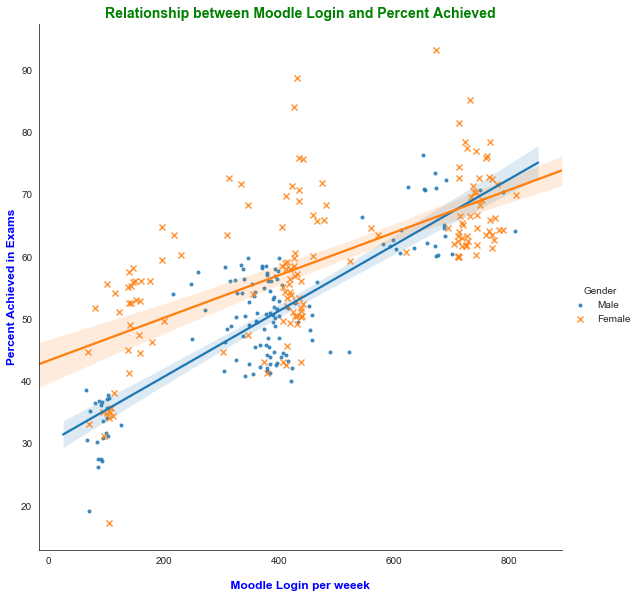

In [43]:
sns.lmplot(x="Login", y="Percent", hue="Gender", markers=[".", "x"], size=8, data=df)

# Format plot
plt.xlabel("\n Moodle Login per weeek \n", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Percent Achieved in Exams", fontweight="bold", fontsize="12", color="b")                                                              
plt.title("Relationship between Moodle Login and Percent Achieved", fontweight="bold", fontsize="14", color="g")  
plt.show()

<i> From the above plot we can see that there is a positive correlation between percent achieved and moodle login, this would infer that people who access the moodle server regularly tend to do better in exams. This sounds plausable as it is clear that hours studied and moodle login are heavily correlatted. Females appear to be more scattered and ahve a numbeer of outliers especially towards the center top of the plot. </i>

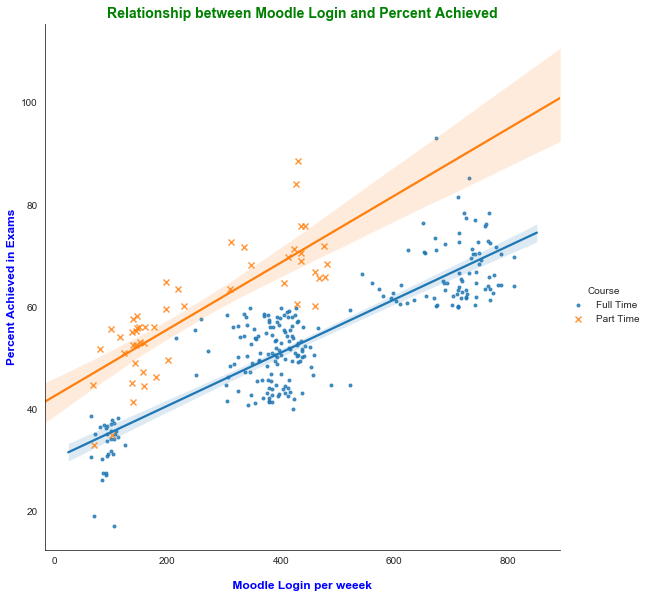

In [44]:
sns.lmplot(x="Login", y="Percent", hue="Course", markers=[".", "x"], size=8, data=df)

# Format plot
plt.xlabel("\n Moodle Login per weeek \n", fontweight="bold", fontsize="12", color="b")                                       
plt.ylabel("Percent Achieved in Exams", fontweight="bold", fontsize="12", color="b")                                                              
plt.title("Relationship between Moodle Login and Percent Achieved", fontweight="bold", fontsize="14", color="g")  
plt.show()

<I>From this plot we can observe the number of students studying part time is significantly less than students who study full time, this can be said as there are fewer data points.  Part time students login less than full time students </i>

<a name="pm"></a>
## Pairplot

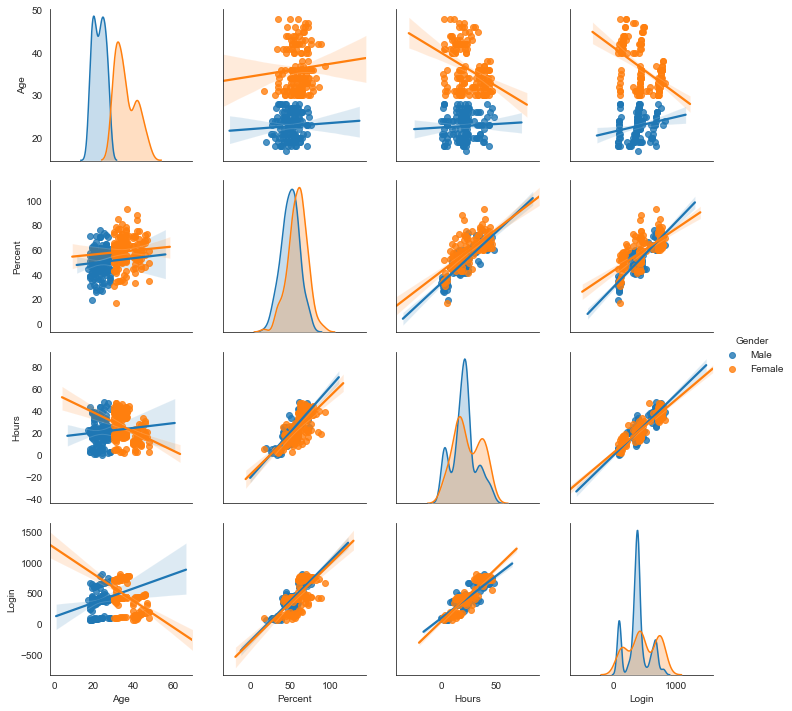

In [45]:
# Plot the running data set with a pair plot.
sns.pairplot(df, hue="Gender", kind="reg")

From the above plots we can see the distinction between males and females
 * We can see a positive correlation between Percent (ehich refers to the overall percent achieved by students) and Hours Spent Studying which in reality makes alot of sense.
 * We can also see a strong postive correlation between Login and Hours Spent Studying which again is reasonable as often when studying students would login to the moodle page to accesss notes
 * Percent received by students is of normal distribution for both males and females which is evident from the bell shaped curve.

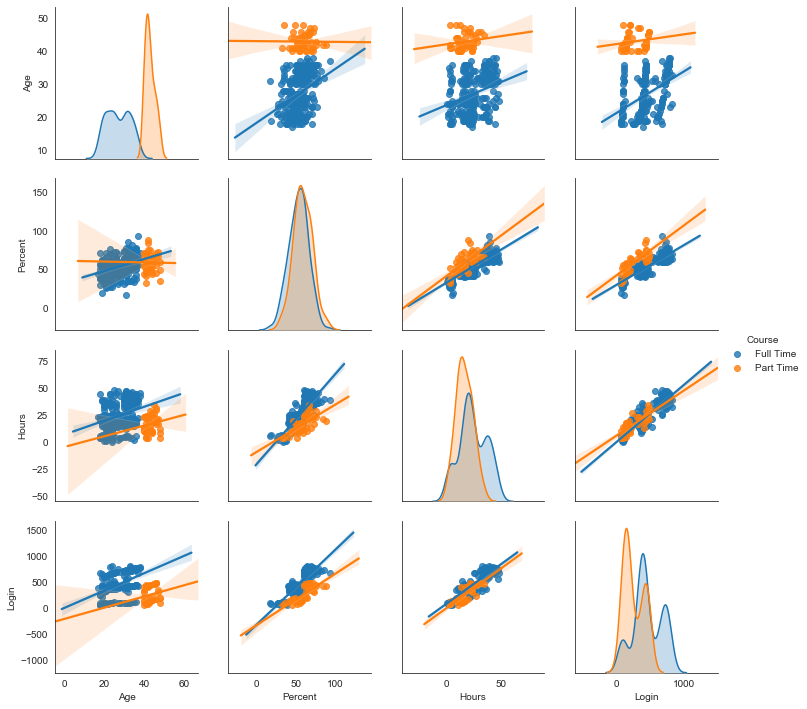

In [46]:
# Plot the running data set with a pair plot.
sns.pairplot(df, hue="Course", kind="reg")

<a name="con"></a>
## Conclusion:

The aim of this project is to create a dataset by simulating a real-world phenomenon. It was important when selecting a database to ensure the dataset created can be measured and should be created using the numpy random package. To the best of my ability throughout the project I tried to obtain actual statistics for GMIT as I wanted to create the more realistic dataset possible. Where there was no statistical information available I used articles from other associations or made reasonable assumptions. 

Overall, it was a very interesting project and allowed me to combine the knowledge I learned over the course of the semester and apply it to a real world phenomenon.

<a name="bib"></a>
## Bibliography:


1. Anon, Statistics Archive. Higher Education Authority. Available at: https://hea.ie/statistics-archive/ [Accessed December 8, 2019].
2. Anon, numpy.random.binomial¶. numpy.random.binomial - NumPy v1.15 Manual. Available at: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html [Accessed December 8, 2019].
3. Anon, numpy.random.uniform¶. numpy.random.uniform - NumPy v1.14 Manual. Available at: https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.uniform.html [Accessed December 8, 2019].
4. Anon, numpy.random.randint¶. numpy.random.randint - NumPy v1.15 Manual. Available at: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html [Accessed December 8, 2019].
5. Vishal, 2019. Python random.choice() to choose random element from list, String, array. pynative. Available at: https://pynative.com/python-random-choice/ [Accessed December 8, 2019].
6. Anon, 2013. GMIT Academic Code of Practice No. 3 Student Assessment: Marks and Standards PAGE 25. Available at: ttps://www.gmit.ie/sites/default/files/public/directorate/docs/code-practice-no3_1.pdf [Accessed December 8, 2019].
7. Kulick, G. & Wright, R., 2008. The Impact of Grading on the Curve: A Simulation Analysis. International Journal for the Scholarship of Teaching and Learning. Available at: https://digitalcommons.georgiasouthern.edu/cgi/viewcontent.cgi?article=1101&context=ij-sotl [Accessed December 8, 2019].
8. Donough, C.M. & Horgran, A., 2000. Gender differences in the results of the final examination at University College Dublin. Available at: https://www.researchgate.net/publication/51353539_Gender_differences_in_the_results_of_the_final_examination_at_University_College_Dublin [Accessed December 8, 2019].
9. Harmon , D. & Erskine, S., 2016. EUROSTUDENT SURVEY VI REPORT ON THE SOCIAL AND LIVING CONDITIONS OF HIGHER EDUCATION STUDENTS IN IRELAND. Available at: https://hea.ie/assets/uploads/2018/01/HEA-Eurostudent-Survey.pdf [Accessed December 8, 2019].
10. Anon, Logistic vs Gaussian. Available at: http://visionlab.harvard.edu/Members/Anne/Math/Logistic_vs_Gaussian.html [Accessed December 8, 2019].
11. Alan & Pryor, seaborn.heatmap. AJ Pryor, Ph.D. Available at: http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/ [Accessed December 8, 2019].
12. Anon, 2016. Matplotlib Pie chart. pythonspot. Available at: https://pythonspot.com/matplotlib-pie-chart/ [Accessed December 8, 2019].
13. Aspembitova, A.A.A., 1969. iterate over pandas rows and set column values based on values in other column. Stack Overflow. Available at: https://stackoverflow.com/a/55115017 [Accessed December 8, 2019].
14. Chakure, A., 2019. Implementation of Linear Regression. Medium. Available at: https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c [Accessed December 12, 2019].
15. Wingate, J., 2019. Boston Dataset scikit-learn Machine Learning in Python. R. Available at: https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/ [Accessed December 12, 2019].
16. Agarwal, A., 2018. Linear Regression on Boston Housing Dataset. Medium. Available at: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 [Accessed December 12, 2019].
M